## Set Up Dependencies


In [1]:
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp


## Fetch and Preprocess Data


In [2]:
df = pd.read_parquet("https://osf.io/pmwn2/download")


In [3]:
df = df.rename(
    columns={
        "annotation_size_bits": "Annotation Size (bits)",
        "algorithm": "Algorithm",
        "population_size": "Population Size",
        "num_generations": "Num Generations",
        "num_islands": "Num Islands",
        "num_niches": "Num Niches",
        "tournament_size": "Tournament Size",
        "replicate": "Replicate",
        "downsample": "Downsample",
        "differentia_width_bits": "Differentia Width (bits)",
    },
)


In [4]:
df["Dynamics"] = (
    "islands"
    + df["Num Islands"].astype(str)
    + "-niches"
    + df["Num Niches"].astype(str)
    + "-tsize"
    + df["Tournament Size"].astype(str)
)


In [5]:
df["Scenario"] = df["Dynamics"].map(
    {
        "islands1-niches1-tsize2": "plain",
        "islands1-niches1-tsize1": "drift",
        "islands4-niches2-tsize2": "mild",
        "islands64-niches8-tsize2": "strong",
    }
)


In [6]:
df["algo"] = df["Algorithm"].map(
    {
        "surf-steady": "surf\nsteady",
        "col-steady": "col\nsteady",
        "surf-hybrid": "surf\nhybrid",
        "surf-tilted": "surf\ntilted",
        "col-tilted": "col\ntilted",
    },
)


In [7]:
df["Scale"] = (
    "npop"
    + df["Population Size"].astype(str)
    + "-ngen"
    + df["Num Generations"].astype(str)
)


In [8]:
df["Outcome Code"] = (
    df["triplet match, strict"] + 2 * df["triplet match, strict/lax"]
)


In [9]:
df["Outcome"] = df["Outcome Code"].map(
    {
        3: "correct",
        2: "unresolved",
        0: "incorrect",
    },
)


## Plot Sampled Triplet Comparisons


('npop4096-ngen10000', 32)


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png


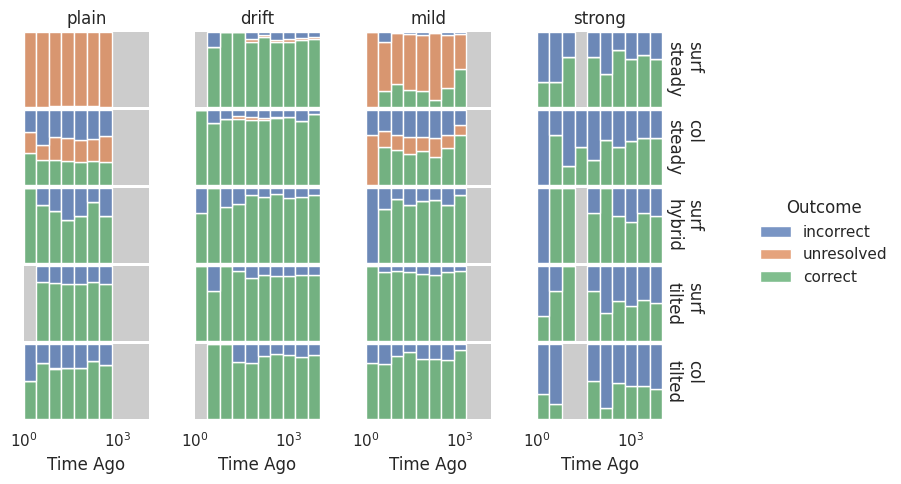

('npop4096-ngen10000', 64)


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png


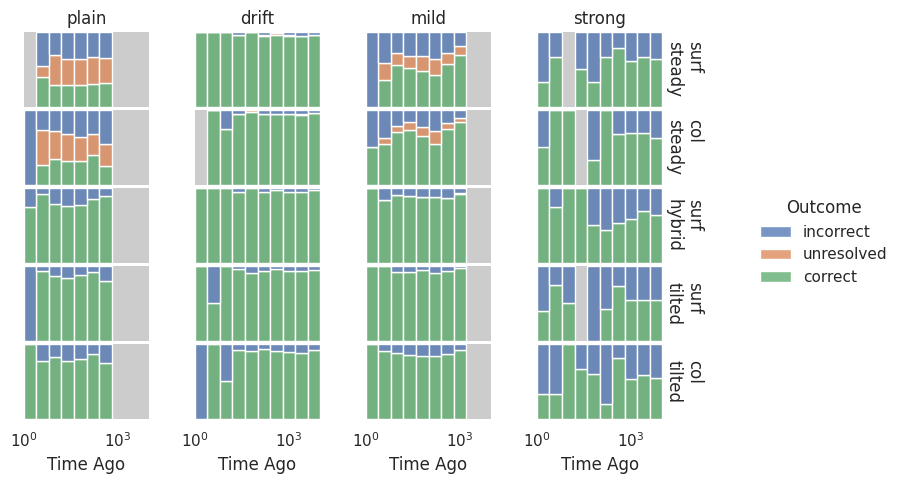

('npop4096-ngen10000', 256)


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png


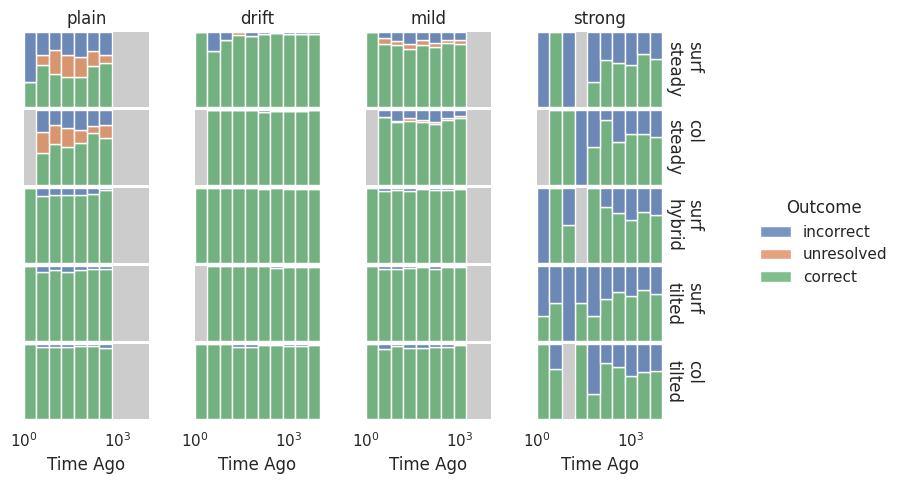

('npop4096-ngen100000', 32)


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png


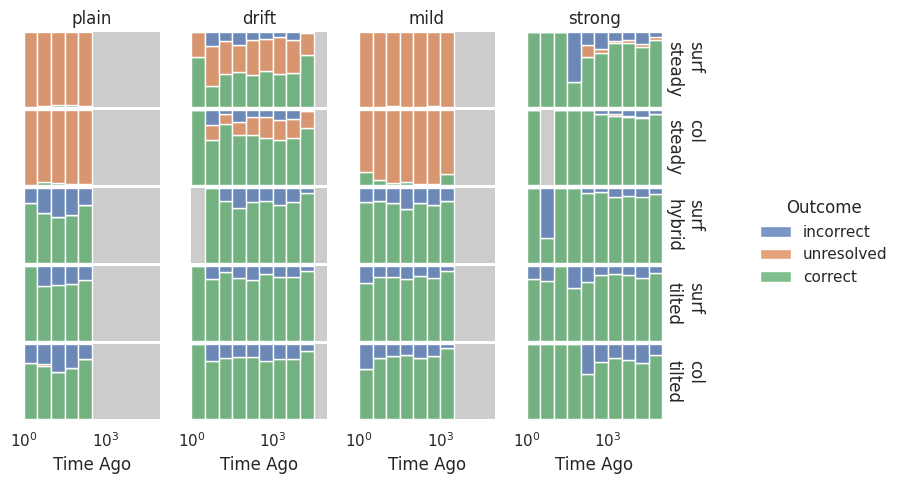

('npop4096-ngen100000', 64)


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png


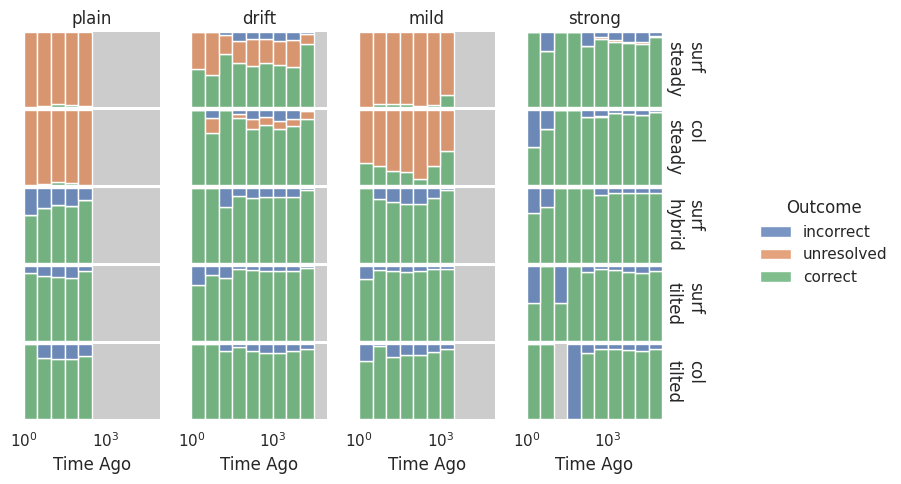

('npop4096-ngen100000', 256)


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png


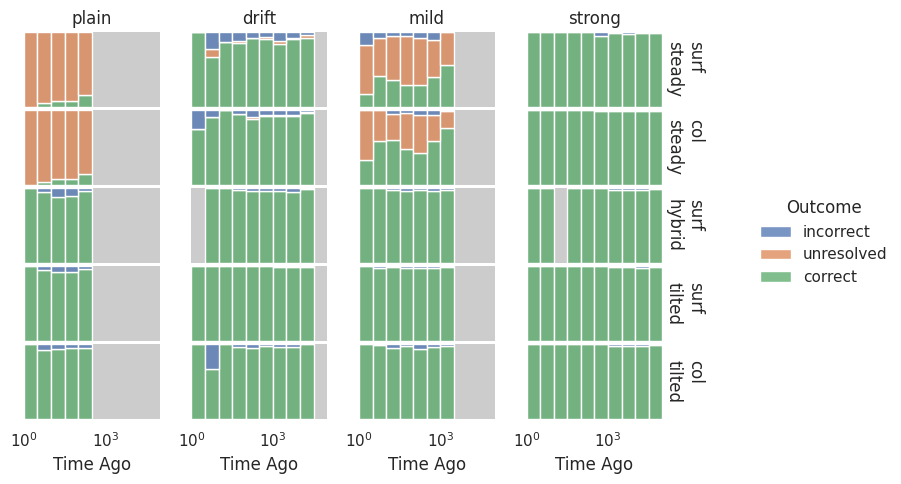

('npop65536-ngen10000', 32)


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png


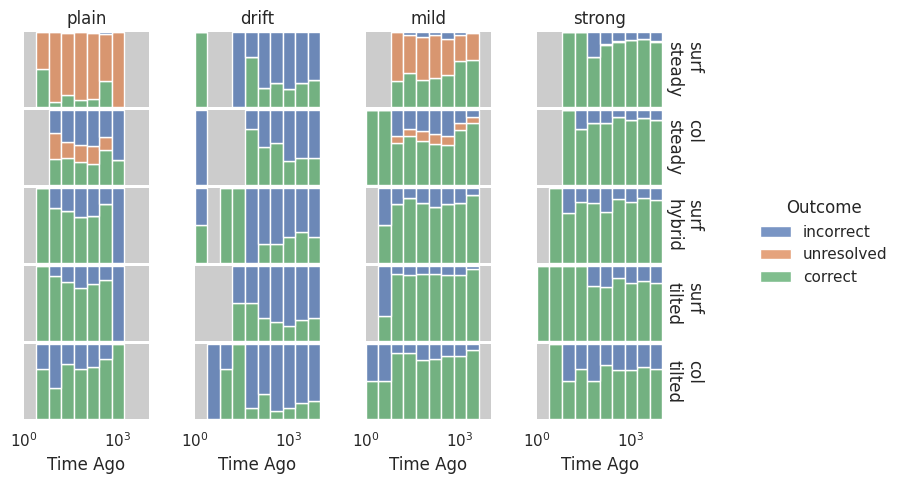

('npop65536-ngen10000', 64)


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png


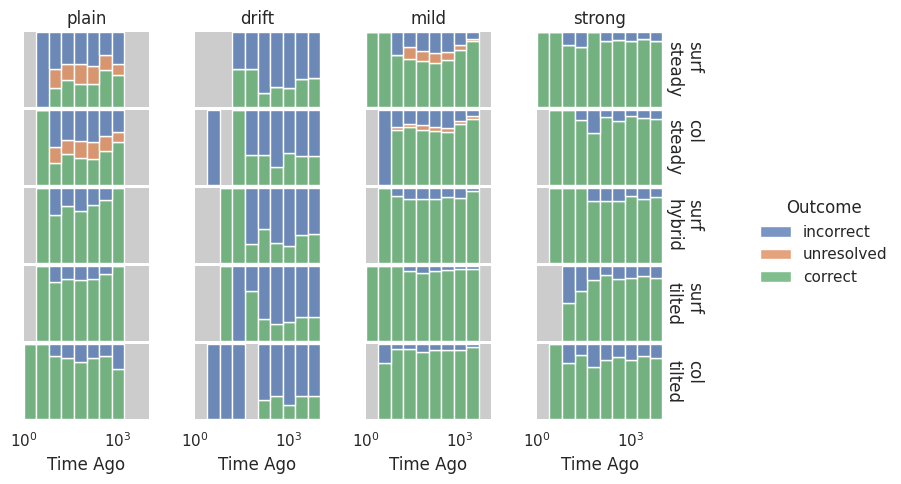

('npop65536-ngen10000', 256)


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png


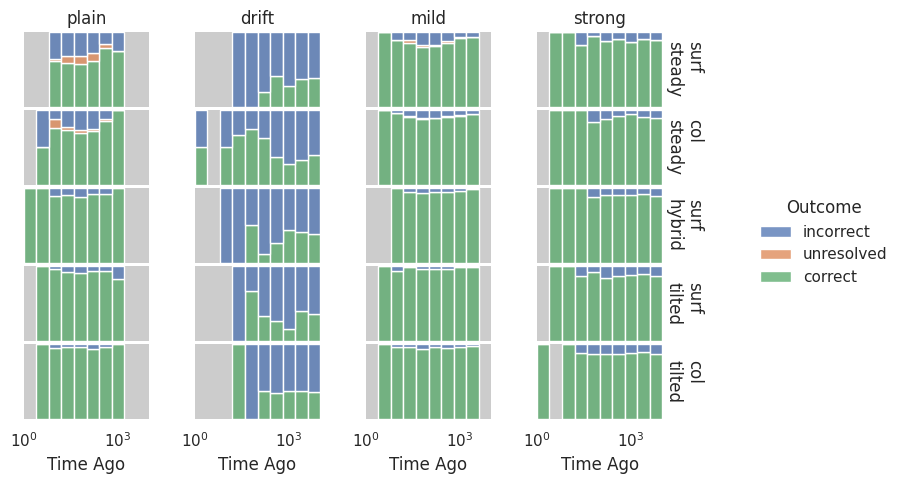

('npop65536-ngen100000', 32)


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png


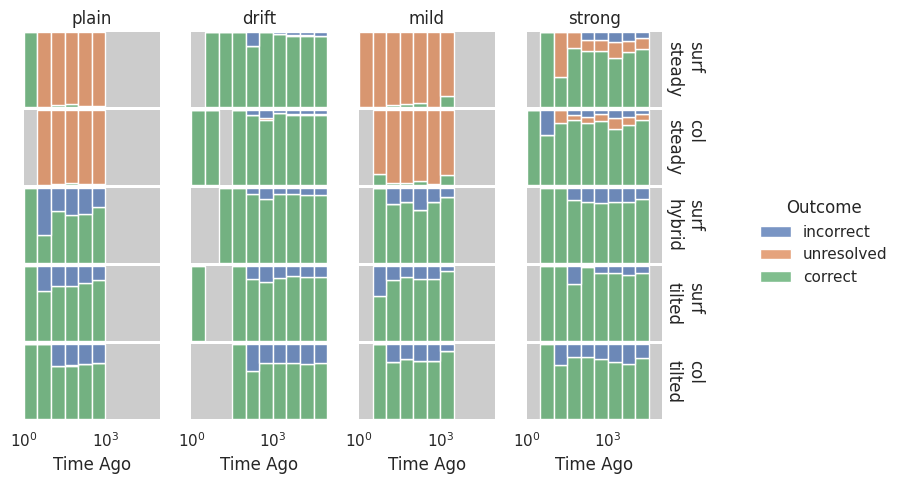

('npop65536-ngen100000', 64)


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png


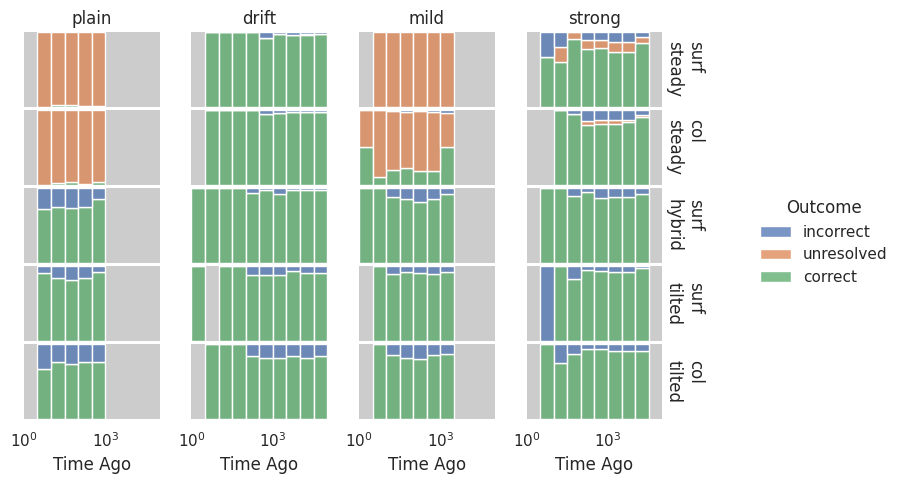

('npop65536-ngen100000', 256)


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png, overwriting it
  warnings.warn(


teeplots/col=scenario+hue=outcome+kind=hist+multiple=fill+row=algo+viz=displot+x=time-ago+ext=.png


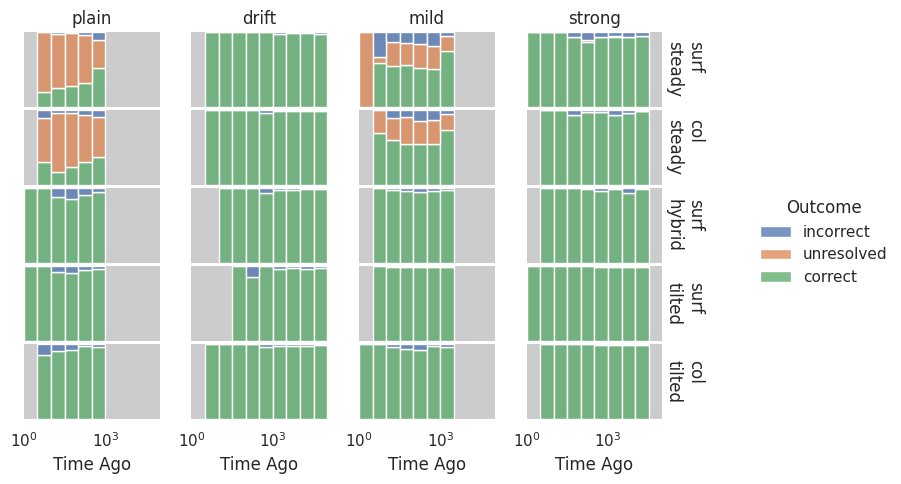

In [10]:
row_order = [
    # "surf-steady",
    # "col-steady",
    # "surf-hybrid",
    # "surf-tilted",
    # "col-tilted",
    "surf\nsteady",
    "col\nsteady",
    "surf\nhybrid",
    "surf\ntilted",
    "col\ntilted",
]

# col_order = [
#     "npop4096-ngen10000",
#     "npop4096-ngen100000",
#     "npop65536-ngen10000",
#     "npop65536-ngen100000",
# ]
col_order = [
    "plain",
    "drift",
    "mild",
    "strong",
    # "spatial/ecological mild",
    # "spatial/ecological strong",
]

sns.set_theme(style="white", rc={"axes.facecolor": (0.8, 0.8, 0.8, 1.0)})

for what, group in (
    df[(df["Downsample"] == 500) & (df["Differentia Width (bits)"] == 1)]
    .sample(
        frac=0.2,
    )
    .groupby(["Scale", "Annotation Size (bits)"])
):
    group["Time Ago"] = group["origin_time"].max() + 1 - group["origin_time"]
    print(what)
    dosave, g = tp.tee(
        sns.displot,
        data=group,
        x="Time Ago",
        row="algo",
        col="Scenario",
        hue="Outcome",
        bins=10,
        multiple="fill",
        common_norm=False,
        aspect=2,
        height=1,
        log_scale=(True, False),
        kind="hist",
        hue_order=["incorrect", "unresolved", "correct"],
        row_order=row_order,
        col_order=col_order,
        facet_kws=dict(margin_titles=True),
        teeplot_callback=True,
    )
    g.figure.subplots_adjust(hspace=0.05)
    g.set_titles(col_template="{col_name}", row_template="{row_name}")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)
    dosave()


## Reproducibility


In [11]:
import datetime

datetime.datetime.now().isoformat()


'2024-03-18T16:44:13.976917'

In [12]:
%load_ext watermark
%watermark


Last updated: 2024-03-18T16:44:13.991114+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.22.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.5.0-1016-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit



In [13]:
!pip freeze


alifedata-phyloinformatics-convert==0.16.2
annotated-types==0.6.0
anytree==2.12.1
argcomplete==3.2.3
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
asttokens==2.4.1
attrs==23.2.0
Automat==20.2.0
Babel==2.8.0
backstrip==0.2.4
bcrypt==3.2.0
beautifulsoup4==4.12.3
biopython==1.83
bitarray==2.9.2
bitstring==4.1.4
black==22.10.0
bleach==6.1.0
blinker==1.4
certifi==2024.2.2
cffi==1.16.0
chardet==4.0.0
charset-normalizer==3.3.2
click==8.1.7
cloud-init==23.4.4
colorama==0.4.4
comm==0.2.1
command-not-found==0.3
configobj==5.0.6
constantly==15.1.0
contourpy==1.2.0
cryptography==3.4.8
cycler==0.12.1
dataclasses==0.6
dbus-python==1.2.18
debugpy==1.8.1
decorator==5.1.1
defusedxml==0.7.1
DendroPy==4.6.1
Deprecated==1.2.14
distro==1.7.0
distro-info==1.1+ubuntu0.2
distutils-strtobool==0.1.0
entrypoints==0.4
ete3==3.1.3
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.1
fonttools==4.49.0
frozendict==2.4.0
gitdb==4.0.11
GitPython==3.1.42
hstrat==1.11.5
hsurf @ git+https://github.com/mmore50